## Performance Plots

A clean notebook to start using trial by trial data frame to make performance plots for animals across sessions.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date, timedelta

from io_utils import *

# settings
%reload_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
 

In [112]:
df = fetch_latest_protocol_data(['R501'])

fetched 35 sessions for R501


In [114]:
x = pd.Timestamp(2022,8,5) # the day antibias was fixed
df[(df['date'] < x)]

,trial,animal_id,date,session_id,hits,violations,temperror,sides,result,sa,sb,delay,fixation,timeouts,helper,stage,is_match,sound_pair
0,1,R501,2022-07-19,879472,1,0,0,r,1,3.0,12.0,0.1,1.100,NaN,0,1,False,"3.0, 12.0"
1,2,R501,2022-07-19,879472,0,0,1,l,4,12.0,12.0,0.1,0.500,0.100,0,1,True,"12.0, 12.0"
2,3,R501,2022-07-19,879472,1,0,0,r,1,3.0,12.0,0.1,0.500,NaN,0,1,False,"3.0, 12.0"
3,4,R501,2022-07-19,879472,1,0,0,r,1,3.0,12.0,0.1,0.500,NaN,0,1,False,"3.0, 12.0"
4,5,R501,2022-07-19,879472,0,0,1,l,4,3.0,3.0,0.1,0.500,0.100,0,1,True,"3.0, 3.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,186,R501,2022-08-04,880564,<NA>,1,<NA>,r,3,3.0,12.0,0.1,0.808,3.500,0,5,False,"3.0, 12.0"
1825,187,R501,2022-08-04,880564,1,0,0,l,1,12.0,12.0,0.1,0.808,NaN,0,5,True,"12.0, 12.0"
1826,188,R501,2022-08-04,880564,<NA>,1,<NA>,r,3,3.0,12.0,0.1,0.810,3.525,0,5,False,"3.0, 12.0"
1827,189,R501,2022-08-04,880564,<NA>,1,<NA>,l,3,3.0,3.0,0.1,0.810,3.550,0,5,True,"3.0, 3.0"


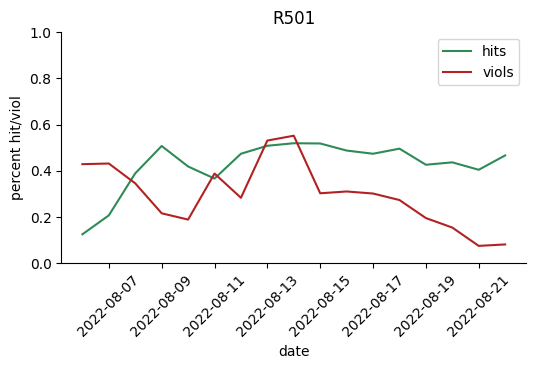

In [155]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax = sns.lineplot(data=df[(df['date'] > x)], x="date", y="hits", color = 'seagreen', ci=None)
ax = sns.lineplot(data=df[(df['date'] > x)], x="date", y="violations", color = 'firebrick', ci=None)
_ = plt.xticks(rotation=45)

plt.legend(['hits', 'viols'])
_ = ax.set(ylabel="percent hit/viol", title="R501",ylim=[0,1])
sns.despine()

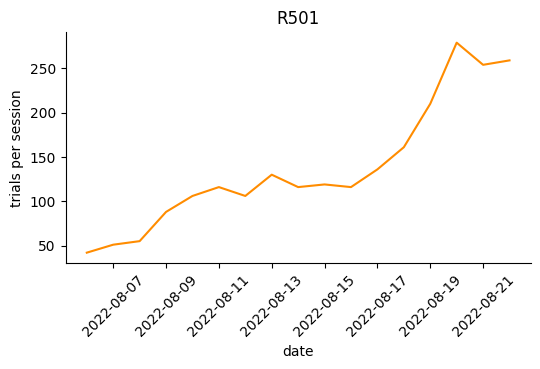

In [141]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax = sns.lineplot(data=df[(df['date'] > x)].groupby('date').max().trial, color="darkorange")
_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "trials per session", title="R501")
sns.despine()

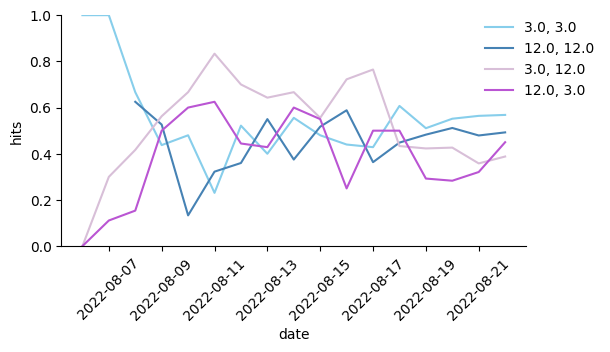

In [157]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
hue_order = ["3.0, 3.0", "12.0, 12.0", "3.0, 12.0", "12.0, 3.0"]
palette = ["skyblue", "steelblue", "thistle", "mediumorchid"]
sns.lineplot(data=df[(df['date'] > x)].groupby(['date','sound_pair']).mean(), 
x = "date", y="hits", hue="sound_pair", hue_order=hue_order, palette=palette)


_ = plt.xticks(rotation=45)
_ = ax.set(ylim=[0,1])
sns.despine()
ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0,frameon=False)

In [118]:
d = date.today() - timedelta(days=7)